In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import Polygon, MultiPolygon, Point
import numpy as np


df = pd.read_csv("/Users/joshuahernandez/Documents/GitHub/HeliosProjectDS/Solar_flare_RHESSI_2015_16.csv")
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['x.pos.asec'],df['y.pos.asec']))

gdf.loc[gdf['year'] == 2015, 'month'] +=12

# Set the batch parameters
batchMaxSize = 4
overlap = 2

# Getting the maximum value of the month column 
max_month = gdf['month'].max()

# Create an array to store the batches of GeoDataFrames
geodataframes = []


# Go through the data and create batches
for start_month in range(1, max_month - batchMaxSize + 2, batchMaxSize - overlap):
    end_month = start_month + batchMaxSize - 1
    # Create a batch within the specified 'start_month' and 'end_month' range
    batch = gdf[(gdf['month'] >= start_month) & (gdf['month'] <= end_month)]
    geodataframes.append(batch)

# #UNCOMMENT TO SEE ALL THE DATA FRAMES
# for idx, batch in enumerate(geodataframes):
#     display(batch)
# print(len(geodataframes))

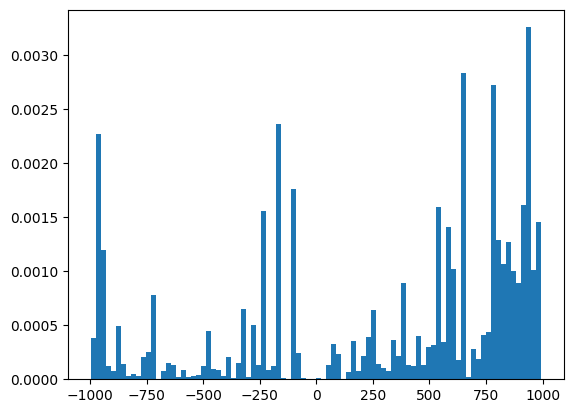

In [103]:
#Setting Currentbranch to batch 0
#All the blue histograms are just an extra way to look at the data 
#THE REAL ANSWERS FOR TASK1-part3 and TASK1-part4 are further down
currentbranch = geodataframes[0]
#method1
xFirstchart= currentbranch['x.pos.asec']
yFirstchart= currentbranch['total.counts']

#THIS IS THE HISTOGRAM FOR MONTHS 1-4 BASED ON TOTAL.COUNTS (x-axis)
histMethod1x = plt.hist(xFirstchart, bins=90, weights=yFirstchart, density=True)
#line below - explains the x and y axiz of histograms
# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

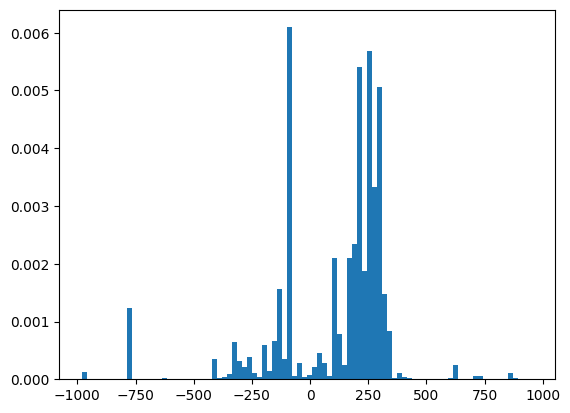

In [104]:
#THIS IS THE HISTOGRAM FOR MONTHS 1-4 BASED ON TOTAL.COUNTS (y-axis)
xsecondChart= currentbranch['y.pos.asec']
ysecondCHart= currentbranch['total.counts']
histMethod1y = plt.hist(xsecondChart, bins=90, weights=ysecondCHart, density=True)

In [105]:
#THIS IS OUR METHOD 2. WE NEEDED TO MULTIPLY ENERGY.KEV BY DURATION.S


x= currentbranch['x.pos.asec']
y= currentbranch['total.counts']

#this line creates the result column in currentbranch(this data gets overwritten later so this line is probably not necessary)
currentbranch['result'] = currentbranch.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)

#Creating new dataframe to manipulate
data = currentbranch['energy.kev']
df = pd.DataFrame(data)

# Parse the values and split first num and second num (energy.kev is set up like this (12-15) so we have to
# seperate the first number from the second number then find the median for our calculation
#this puts the first and second numbers in new columns
df[['start', 'end']] = currentbranch['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numbers
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
currentbranch['median'] = df[['start', 'end']].median(axis=1)

currentbranch['result'] = currentbranch["median"]*currentbranch["duration.s"]

# display(currentbranch)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


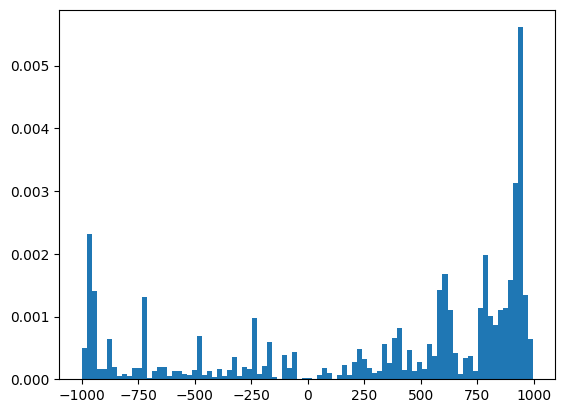

In [106]:
#THIS IS THE HISTOGRAM FOR MONTHS 1-4 BASED ON ENERGY.KEV * DURATION.S [RESULTS] (x-axis)
x_2= currentbranch['x.pos.asec']
y_2= currentbranch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

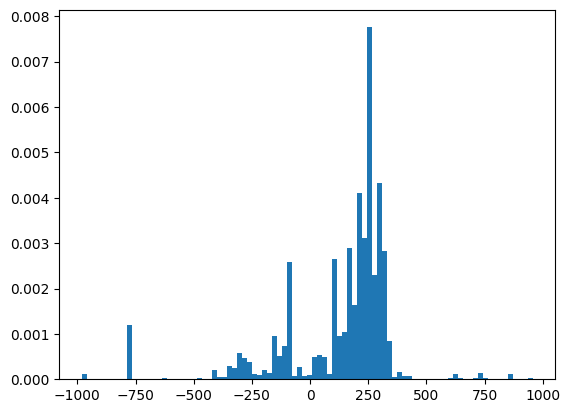

In [107]:
#THIS IS THE HISTOGRAM FOR MONTHS 1-4 BASED ON ENERGY.KEV * DURATION.S [RESULTS] (Y-axis)
x_2= currentbranch['y.pos.asec']
y_2= currentbranch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

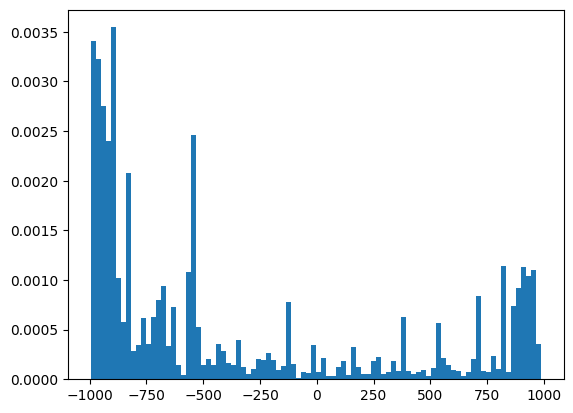

In [108]:
#THIS IS THE HISTOGRAM FOR MONTHS 21-24 BASED ON TOTAL.COUNT(x-axis)
lastbatch = geodataframes[10]
x_lastbatch= lastbatch['x.pos.asec']
y_lastbatch= lastbatch['total.counts']

hist = plt.hist(x_lastbatch, bins=90, weights=y_lastbatch, density=True)


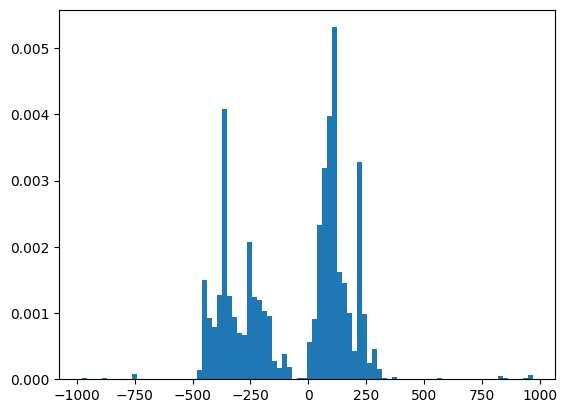

In [109]:
#THIS IS THE HISTOGRAM FOR MONTHS 21-24 BASED ON TOTAL.COUNT(y-axis)
x_l= lastbatch['y.pos.asec']
y_l= lastbatch['total.counts']

hist = plt.hist(x_l, bins=90, weights=y_l, density=True)

In [110]:
#THIS IS THE HISTOGRAM FOR MONTHS 21-24 BASED ON TOTAL.COUNT(x-axis)
x= lastbatch['x.pos.asec']
y= lastbatch['total.counts']

lastbatch['result'] = lastbatch.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)
# hist = plt.hist(x, bins=90, weights=y, density=True)

# Create a DataFrame (you should have your DataFrame loaded)
data = lastbatch['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = lastbatch['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
lastbatch['median'] = df[['start', 'end']].median(axis=1)
# display(currentbranch)

lastbatch['result'] = lastbatch["median"]*lastbatch["duration.s"]
# display(lastbatch)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


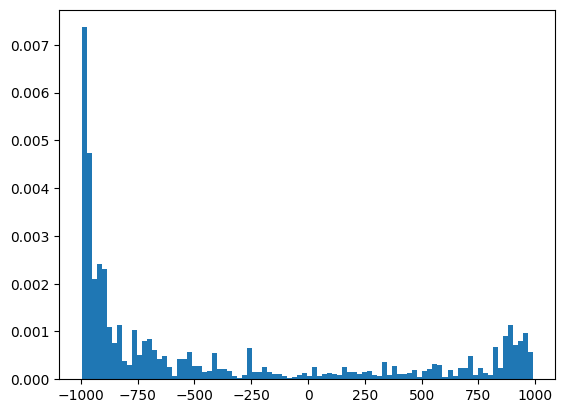

In [111]:
#THIS IS THE HISTOGRAM FOR MONTHS 21-24 BASED ON ENERGY.KEV * DURATION.SEC(x-axis)
x_2= lastbatch['x.pos.asec']
y_2= lastbatch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)


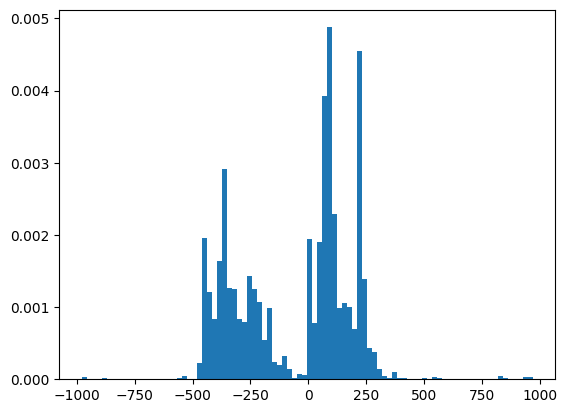

In [112]:
#THIS IS THE HISTOGRAM FOR MONTHS 21-24 BASED ON ENERGY.KEV * DURATION.SEC(Y-axis)
x_l= lastbatch['y.pos.asec']
y_l= lastbatch['result']

hist = plt.hist(x_l, bins=90, weights=y_l, density=True)

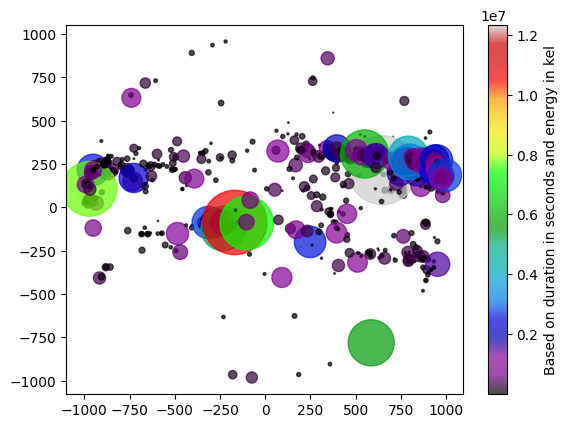

In [113]:
#!!!!!!! THIS IS THE FINAL ANSWER OF TASK1 PART 3 METHOD1 !!!!!!!
x_list=currentbranch['x.pos.asec']
y_list=currentbranch['y.pos.asec']
z_list=currentbranch['total.counts']

colors= z_list

cmap=plt.get_cmap('nipy_spectral')
sizes=z_list*0.0002

plt.scatter(x_list,y_list,c=colors,s=sizes,cmap=cmap, alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('Based on duration in seconds and energy in kel')
plt.show()

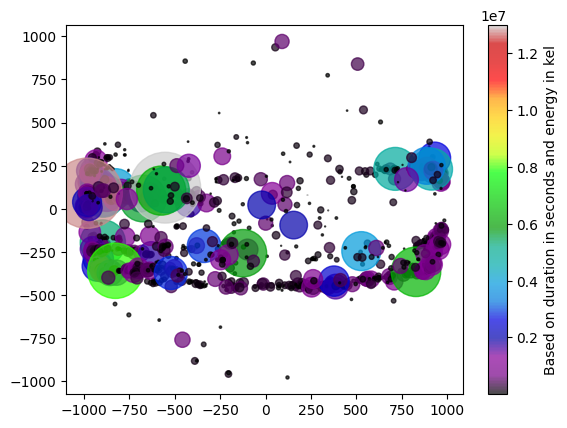

In [114]:
#!!!!!!! THIS IS THE FINAL ANSWER OF TASK1 PART 4 METHOD1 !!!!!!!
x_list=lastbatch['x.pos.asec']
y_list=lastbatch['y.pos.asec']
z_list=lastbatch['total.counts']

colors= z_list

cmap=plt.get_cmap('nipy_spectral')
sizes=z_list*0.0002


plt.scatter(x_list,y_list,c=colors,s=sizes,cmap=cmap, alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('Based on duration in seconds and energy in kel')
plt.show()


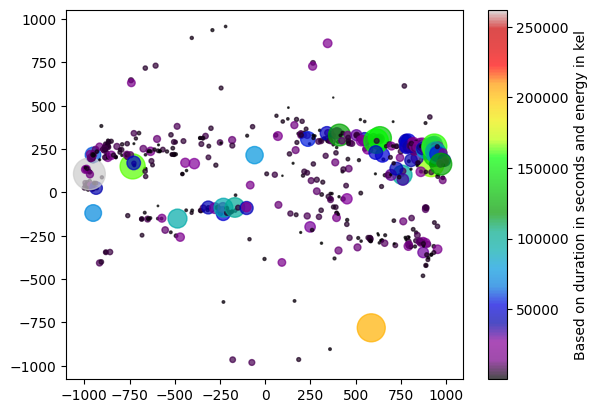

In [115]:
#!!!!!!! THIS IS THE FINAL ANSWER OF TASK1 PART 3 METHOD2 !!!!!!!
x_list=currentbranch['x.pos.asec']
y_list=currentbranch['y.pos.asec']
z_list=currentbranch['result']

colors= z_list

cmap=plt.get_cmap('nipy_spectral')
sizes=z_list*0.002


plt.scatter(x_list,y_list,c=colors,s=sizes,cmap=cmap, alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('Based on duration in seconds and energy in kel')
plt.show()


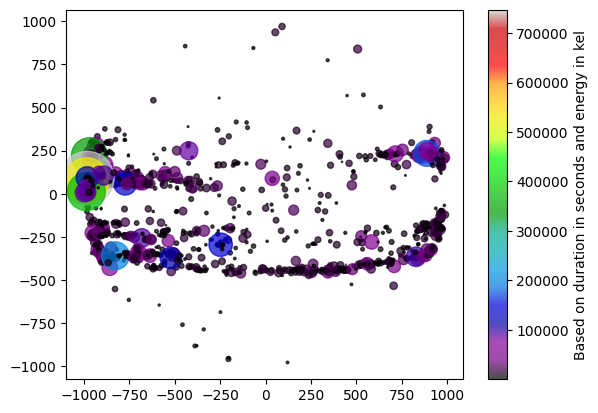

In [116]:
#!!!!!!! THIS IS THE FINAL ANSWER OF TASK1 PART 4 METHOD2 !!!!!!!
x_list=lastbatch['x.pos.asec']
y_list=lastbatch['y.pos.asec']
z_list=lastbatch['result']

colors= z_list

cmap=plt.get_cmap('nipy_spectral')
sizes=z_list*0.002


plt.scatter(x_list,y_list,c=colors,s=sizes,cmap=cmap, alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('Based on duration in seconds and energy in kel')
plt.show()


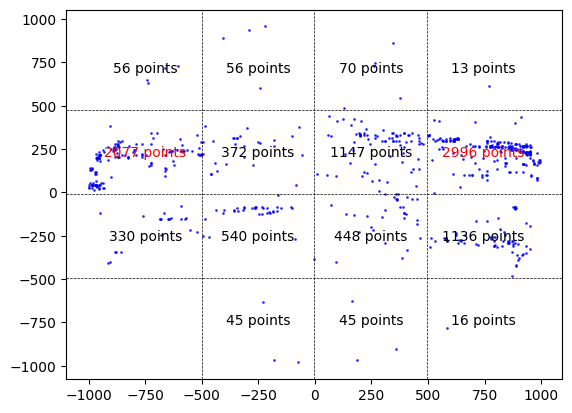

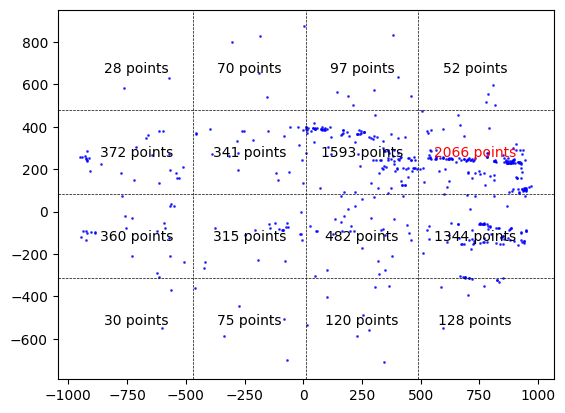

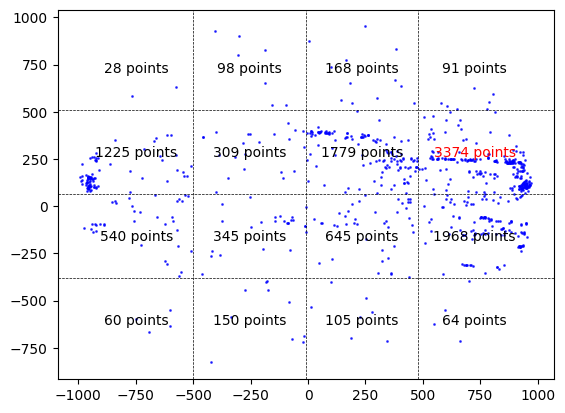

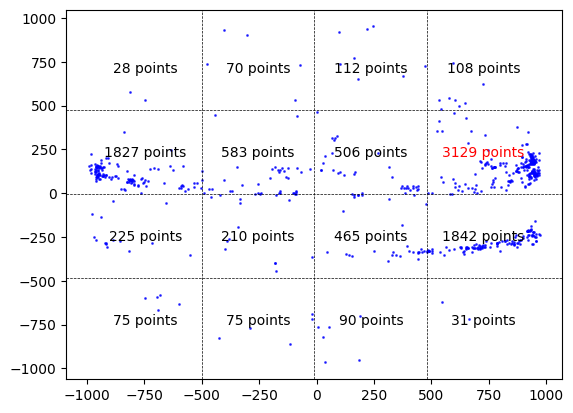

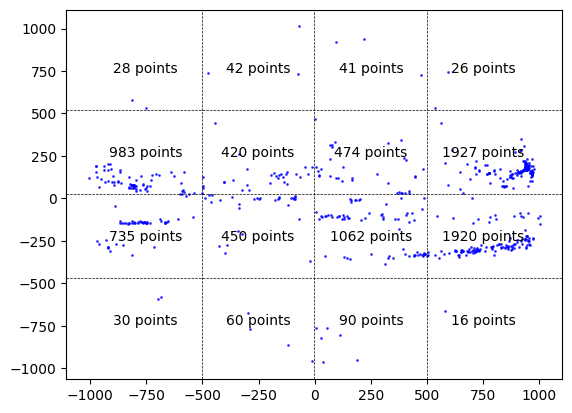

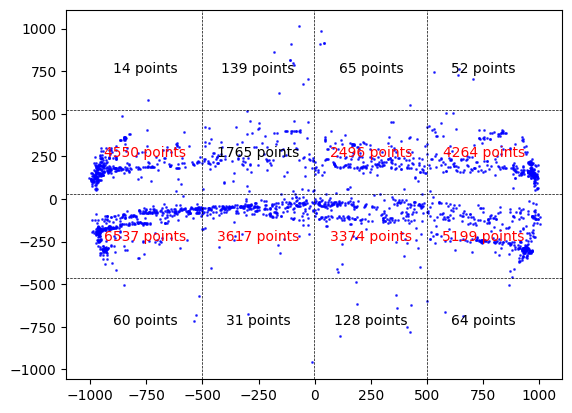

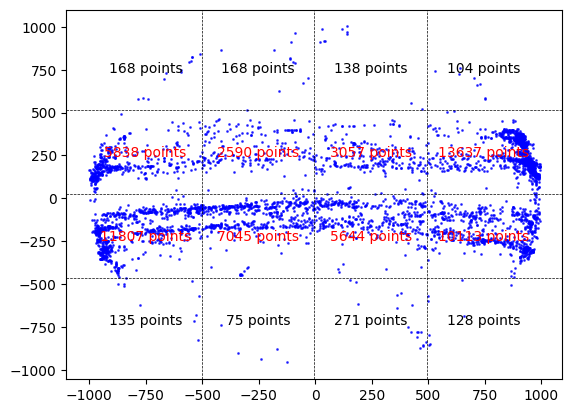

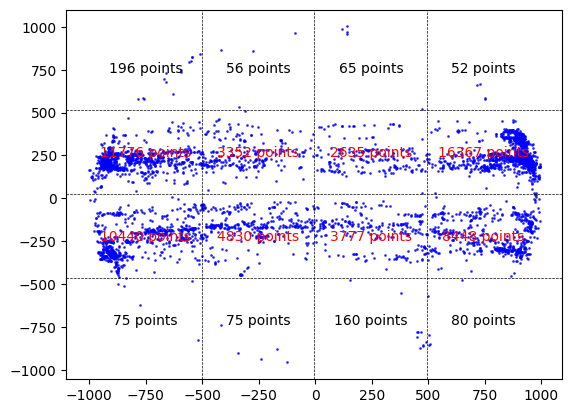

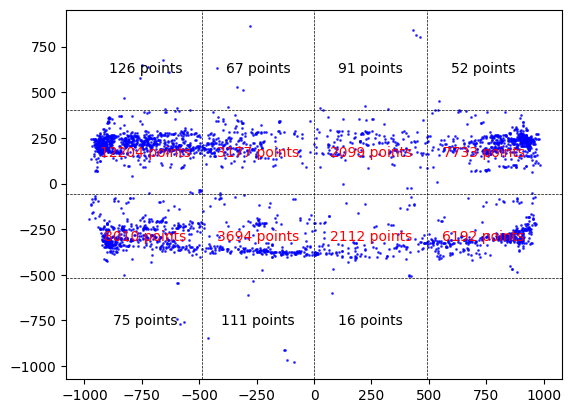

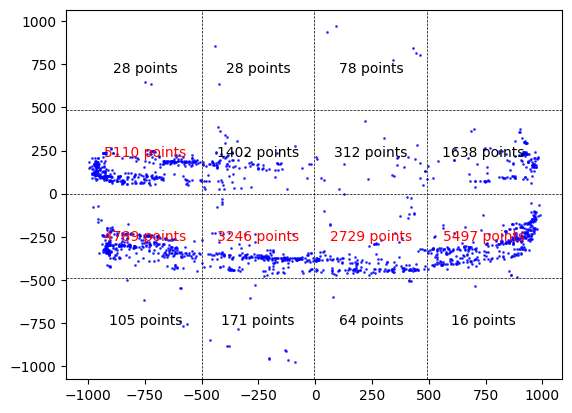

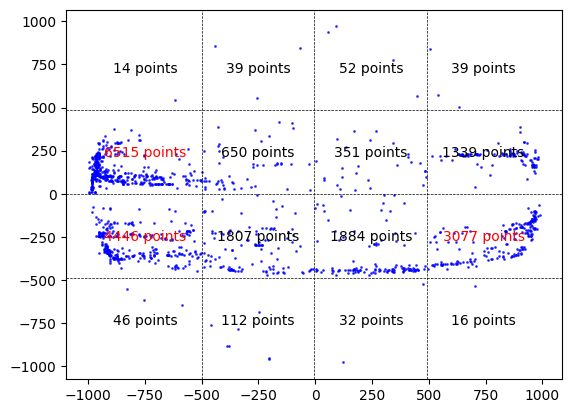

In [117]:
#!!!FINAL ANSWER FOR TASK2 PART D (REGIONAL HOTZONES)
import matplotlib.pyplot as plt
import numpy as np
for lastbatch in geodataframes:
    # Assuming x_list and y_list are your x and y coordinates
    x_list = lastbatch['x.pos.asec']
    y_list = lastbatch['y.pos.asec']

    # Define boundaries for quadrants
    x_mid = np.median(x_list)
    y_mid = np.median(y_list)

    # Assign each point to a quadrant
    quadrant = np.zeros(len(x_list))
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 1  # Quadrant 1
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 2  # Quadrant 2
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 3  # Quadrant 3
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 4  # Quadrant 4
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 5  # Quadrant 5
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 6  # Quadrant 6
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 7  # Quadrant 7
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 8  # Quadrant 8
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 9  # Quadrant 9
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 10  # Quadrant 10
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 11  # Quadrant 11
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 12  # Quadrant 12
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 13  # Quadrant 13
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 14  # Quadrant 14
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 15  # Quadrant 15
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 16  # Quadrant 16

    # Create a 2D histogram to get the count in each quadrant
    hist, x_edges, y_edges = np.histogram2d(x_list, y_list, bins=[4, 4], range=[[min(x_list), max(x_list)], [min(y_list), max(y_list)]], weights=quadrant)

    # Define out threshold(we chose 2000 for our d2)
    threshold = 2000

    # Create a mask for quadrants with data
    data_mask = hist > 0

    # Plot the scatter plot with different colors for each quadrant
    scatter = plt.scatter(x_list, y_list, c='blue', alpha=0.7, s=1)

    # Draw grid lines to represent quadrant borders
    for i in range(1, 4):
        plt.axvline(x=x_edges[i], color='black', linestyle='--', linewidth=0.5)
    for j in range(1, 4):
        plt.axhline(y=y_edges[j], color='black', linestyle='--', linewidth=0.5)

    # If a quadrant goes over the threshold, then we paint the numbers red
    for i in range(4):
        for j in range(4):
            if hist[i, j] > threshold:
                color = 'red'
            else:
                color = 'black' if data_mask[i, j] else 'white'
            plt.annotate(f'{int(hist[i, j])} points', xy=(x_edges[i] + 0.5 * (x_edges[i + 1] - x_edges[i]), y_edges[j] + 0.5 * (y_edges[j + 1] - y_edges[j])), ha='center', va='center', color=color)

    plt.show()


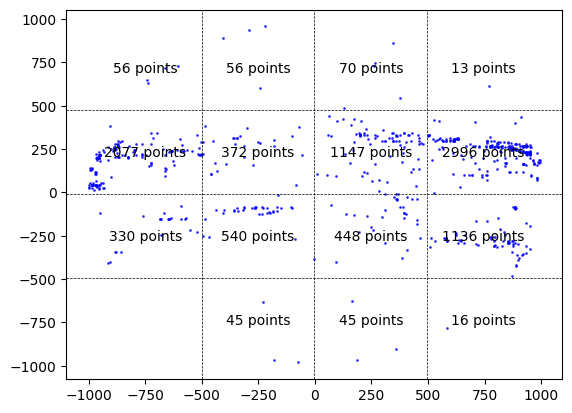

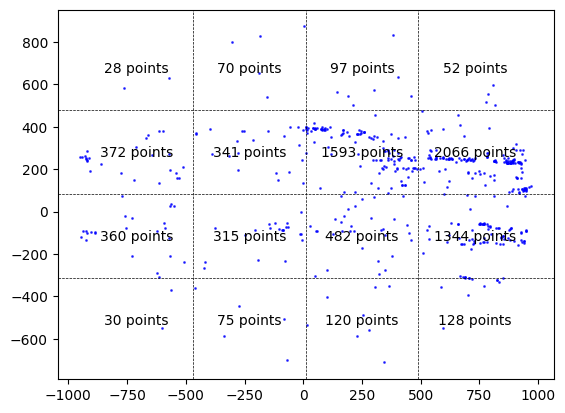

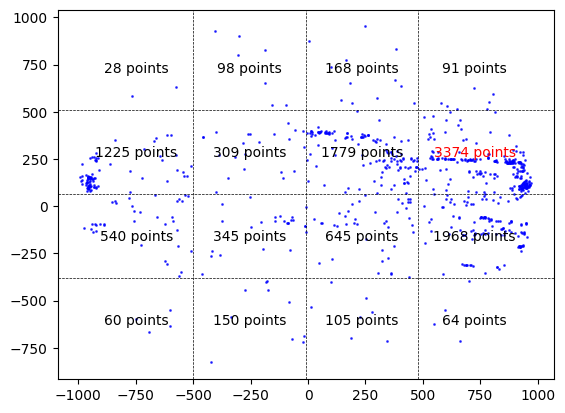

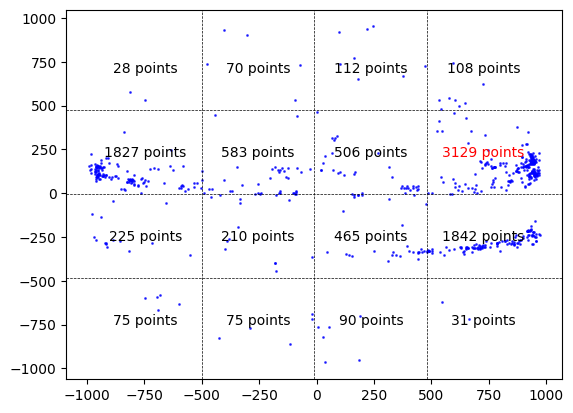

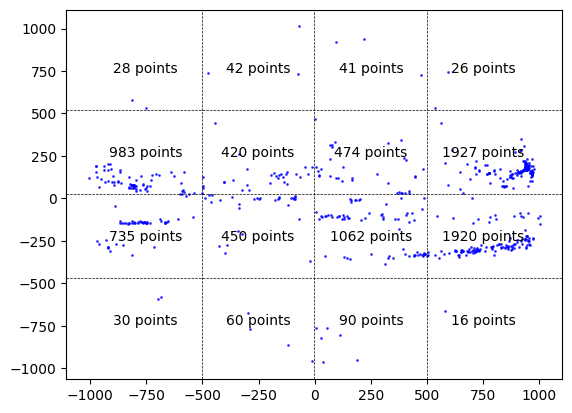

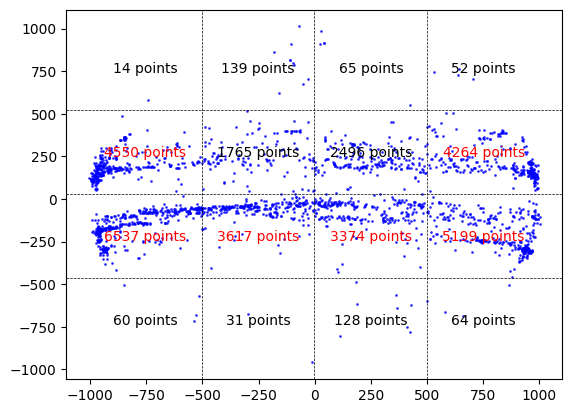

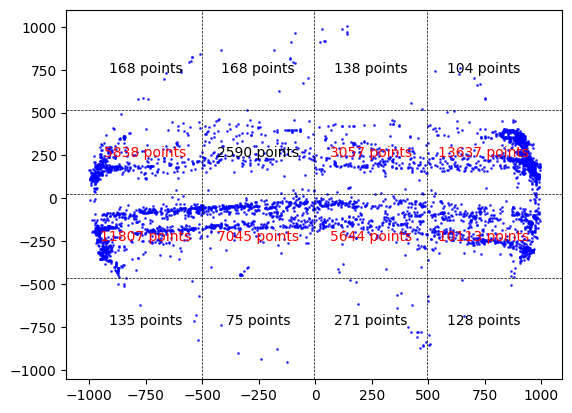

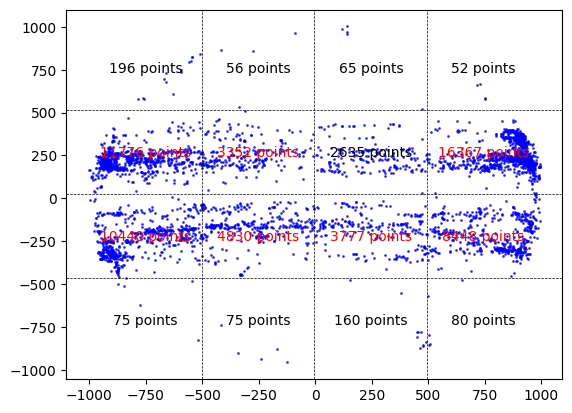

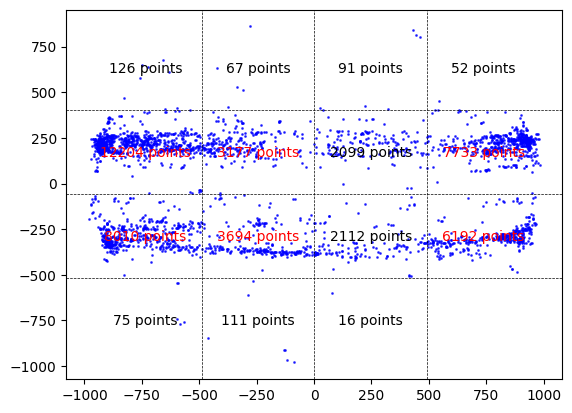

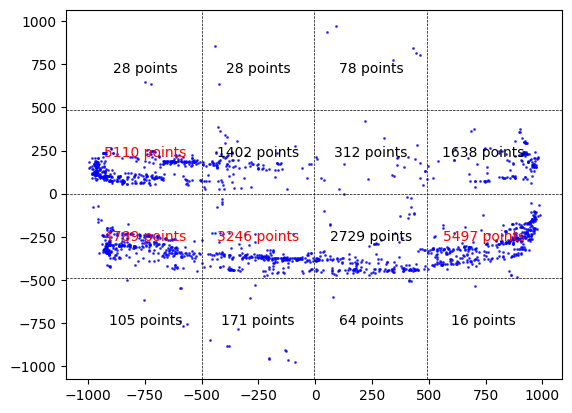

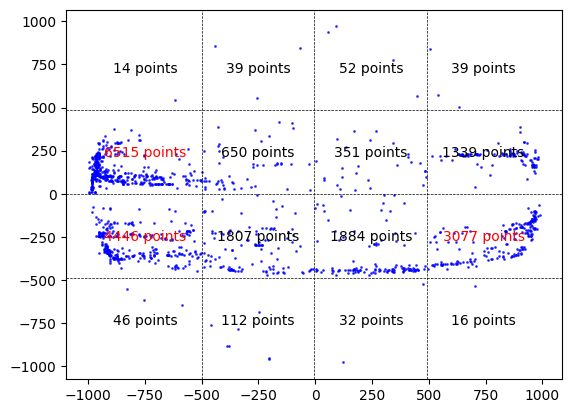

In [118]:
#!!!FINAL ANSWER FOR TASK2 PART E (SUPERHOT ZONES)
import matplotlib.pyplot as plt
import numpy as np

for lastbatch in geodataframes:
    # Assuming x_list and y_list are your x and y coordinates
    x_list = lastbatch['x.pos.asec']
    y_list = lastbatch['y.pos.asec']

    # Define boundaries for quadrants
    x_mid = np.median(x_list)
    y_mid = np.median(y_list)

    # Assign each point to a quadrant
    quadrant = np.zeros(len(x_list))
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 1  # Quadrant 1
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 2  # Quadrant 2
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 3  # Quadrant 3
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 4  # Quadrant 4
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 5  # Quadrant 5
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 6  # Quadrant 6
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 7  # Quadrant 7
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 8  # Quadrant 8
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 9  # Quadrant 9
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 10  # Quadrant 10
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 11  # Quadrant 11
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 12  # Quadrant 12
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 13  # Quadrant 13
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 14  # Quadrant 14
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 15  # Quadrant 15
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 16  # Quadrant 16

    # Create a 2D histogram to get the count in each quadrant
    hist, x_edges, y_edges = np.histogram2d(x_list, y_list, bins=[4, 4], range=[[min(x_list), max(x_list)], [min(y_list), max(y_list)]], weights=quadrant)

    # Define our threshold(we choose 3000 for our d1)
    threshold = 3000

    # Create a mask for quadrants with data
    data_mask = hist > 0

    # Plot the scatter plot with different colors for each quadrant
    scatter = plt.scatter(x_list, y_list, c='blue', alpha=0.7, s=1)

    # Draw grid lines to represent quadrant borders
    for i in range(1, 4):
        plt.axvline(x=x_edges[i], color='black', linestyle='--', linewidth=0.5)
    for j in range(1, 4):
        plt.axhline(y=y_edges[j], color='black', linestyle='--', linewidth=0.5)

    # If (a quadrant passes the threshold, then we paint the numbers of the quadrant red)
    for i in range(4):
        for j in range(4):
            if hist[i, j] > threshold:
                color = 'red'
            else:
                color = 'black' if data_mask[i, j] else 'white'
            plt.annotate(f'{int(hist[i, j])} points', xy=(x_edges[i] + 0.5 * (x_edges[i + 1] - x_edges[i]), y_edges[j] + 0.5 * (y_edges[j + 1] - y_edges[j])), ha='center', va='center', color=color)

    plt.show()